Số lớp: 2
Danh sách lớp: ['awake', 'drowsy']
Số ảnh trong tập train: 1056


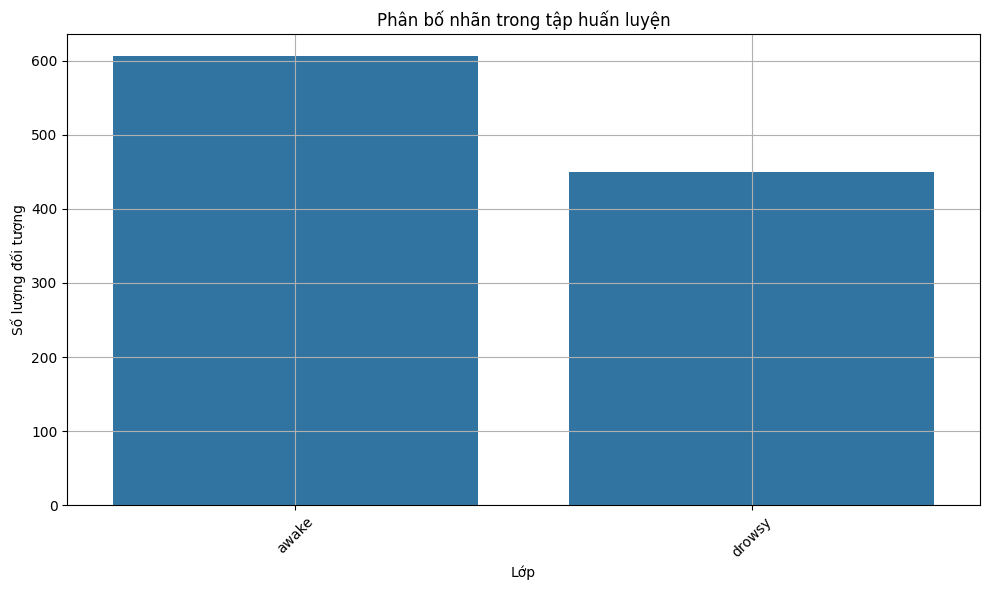

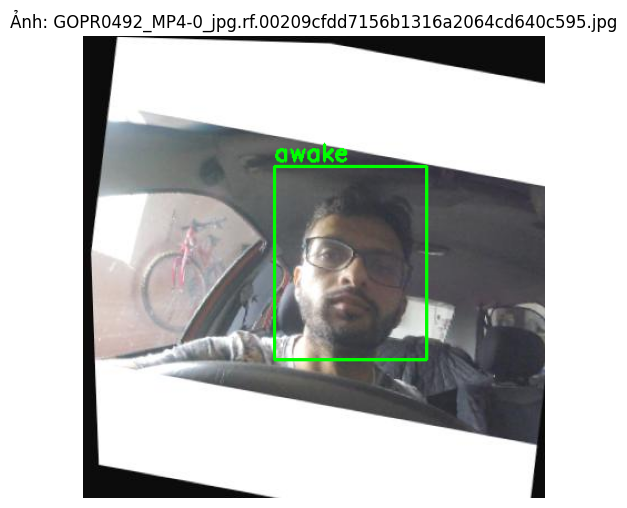

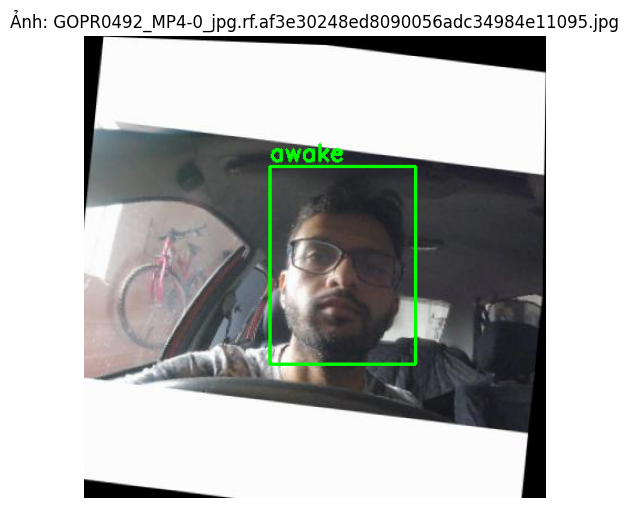

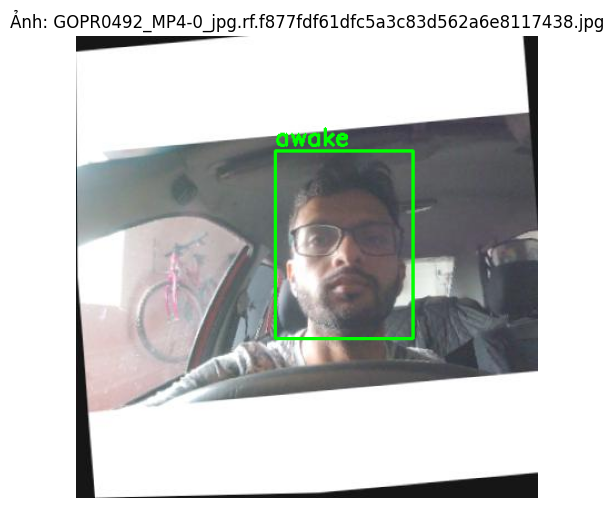

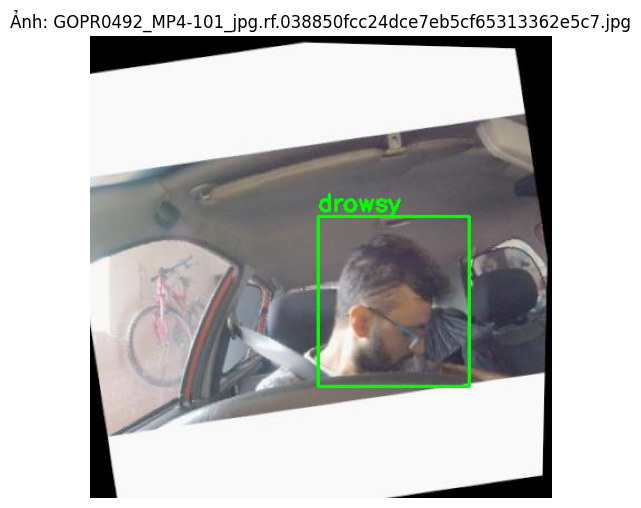

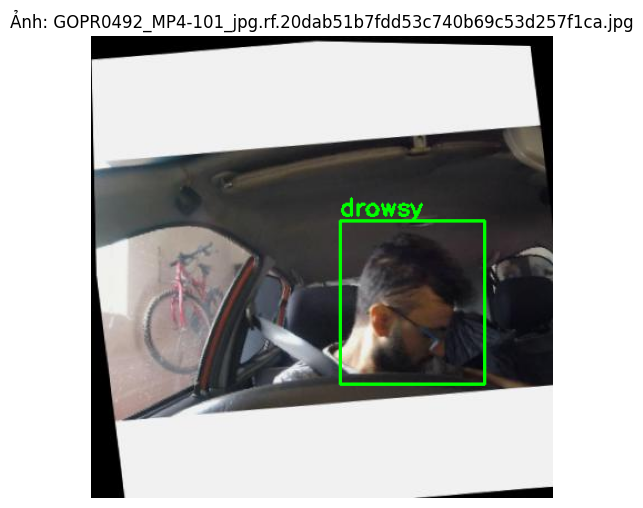

In [1]:
import os
import cv2
import yaml
import matplotlib.pyplot as plt
import seaborn as sns

# Cấu hình dataset
DATASET_PATH = './Drowsiness Detection.v2-augmented-v1.yolov8'  # đổi tên folder phù hợp
IMAGE_PATH = os.path.join(DATASET_PATH, 'train', 'images')
LABEL_PATH = os.path.join(DATASET_PATH, 'train', 'labels')
YAML_PATH = os.path.join(DATASET_PATH, 'data.yaml')

# Đọc file data.yaml
with open(YAML_PATH, 'r') as file:
    data_yaml = yaml.safe_load(file)
    class_names = data_yaml['names']
    num_classes = data_yaml['nc']

print(f"Số lớp: {num_classes}")
print("Danh sách lớp:", class_names)

# Thống kê số ảnh
image_files = [f for f in os.listdir(IMAGE_PATH) if f.endswith(('.jpg', '.png', '.jpeg'))]
print(f"Số ảnh trong tập train: {len(image_files)}")

# Phân tích label
label_count = [0] * num_classes
image_with_objects = 0

for label_file in os.listdir(LABEL_PATH):
    with open(os.path.join(LABEL_PATH, label_file), 'r') as f:
        lines = f.readlines()
        if len(lines) > 0:
            image_with_objects += 1
        for line in lines:
            class_id = int(line.strip().split()[0])
            label_count[class_id] += 1

# Biểu đồ phân bố class
plt.figure(figsize=(10, 6))
sns.barplot(x=class_names, y=label_count)
plt.title("Phân bố nhãn trong tập huấn luyện")
plt.xlabel("Lớp")
plt.ylabel("Số lượng đối tượng")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Hiển thị ảnh minh hoạ kèm bounding box
def draw_bbox(image_path, label_path, class_names):
    image = cv2.imread(image_path)
    h, w = image.shape[:2]
    with open(label_path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            cls, x, y, bw, bh = map(float, line.strip().split())
            x1 = int((x - bw / 2) * w)
            y1 = int((y - bh / 2) * h)
            x2 = int((x + bw / 2) * w)
            y2 = int((y + bh / 2) * h)
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(image, class_names[int(cls)], (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
    return image

# Hiển thị vài ảnh đầu tiên với bbox
for img_file in image_files[:5]:
    img_path = os.path.join(IMAGE_PATH, img_file)
    label_path = os.path.join(LABEL_PATH, img_file.replace('.jpg', '.txt').replace('.png', '.txt'))
    image = draw_bbox(img_path, label_path, class_names)
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Ảnh: {img_file}")
    plt.show()


In [4]:
from ultralytics import YOLO

# Bước 1: Load model YOLOv8 (có thể dùng yolov8n.pt, yolov8s.pt, yolov8m.pt, yolov8l.pt, yolov8x.pt)
model = YOLO('yolov8n.pt')  # hoặc yolov8s.pt cho mô hình lớn hơn

# Bước 2: Huấn luyện mô hình
results = model.train(
    data='D:\proj\drowsiness_ebds\dnn\Drowsiness Detection.v2-augmented-v1.yolov8\data.yaml',   # đường dẫn tới file YAML mô tả dataset
    epochs=30,                       # số epoch
    imgsz=640,                       # kích thước ảnh đầu vào
    batch=16,                        # kích thước batch
    name='my_yolov8_model',          # tên model output
    device='cpu'
)


Ultralytics 8.3.113  Python-3.10.15 torch-2.6.0+cpu CPU (AMD Ryzen 7 5800H with Radeon Graphics)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=D:\proj\drowsiness_ebds\dnn\Drowsiness Detection.v2-augmented-v1.yolov8\data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=my_yolov8_model6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, 

train: Scanning D:\proj\drowsiness_ebds\dnn\Drowsiness Detection.v2-augmented-v1.yolov8\train\labels.cache... 1056 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1056/1056 [00:00<?, ?it/s]

val: Fast image access  (ping: 0.00.0 ms, read: 181.534.9 MB/s, size: 17.1 KB)



val: Scanning D:\proj\drowsiness_ebds\dnn\Drowsiness Detection.v2-augmented-v1.yolov8\valid\labels.cache... 103 images, 0 backgrounds, 0 corrupt: 100%|██████████| 103/103 [00:00<?, ?it/s]

Plotting labels to runs\detect\my_yolov8_model6\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\my_yolov8_model6
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30         0G      1.222      3.021      1.305         22        640:  45%|████▌     | 30/66 [02:29<03:00,  5.00s/it]

: 

In [3]:
import torch
print(torch.cuda.is_available())  # True nếu đã có GPU
# print(torch.cuda.get_device_name(0))  # Tên GPU


False
